<b>Use Google's multimodal model Gemini to classify images</b>

Upload your favorite image and get Gemini to describe the image.

In [1]:
#@title Configure Gemini API key

#Access your Gemini API key

import google.generativeai as genai
from google.colab import userdata

gemini_api_secret_name = 'GOOGLE_API_KEY'  # @param {type: "string"}

try:
  GOOGLE_API_KEY=userdata.get(gemini_api_secret_name)
  genai.configure(api_key=GOOGLE_API_KEY)
except userdata.SecretNotFoundError as e:
   print(f'Secret not found\n\nThis expects you to create a secret named {gemini_api_secret_name} in Colab\n\nVisit https://makersuite.google.com/app/apikey to create an API key\n\nStore that in the secrets section on the left side of the notebook (key icon)\n\nName the secret {gemini_api_secret_name}')
   raise e
except userdata.NotebookAccessError as e:
  print(f'You need to grant this notebook access to the {gemini_api_secret_name} secret in order for the notebook to access Gemini on your behalf.')
  raise e
except Exception as e:
  # unknown error
  print(f"There was an unknown error. Ensure you have a secret {gemini_api_secret_name} stored in Colab and it's a valid key from https://makersuite.google.com/app/apikey")
  raise e

model = genai.GenerativeModel('gemini-pro-vision')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  405k  100  405k    0     0  2277k      0 --:--:-- --:--:-- --:--:-- 2288k


""
"These are meal prep containers with chicken, brown rice, broccoli, and peppers."

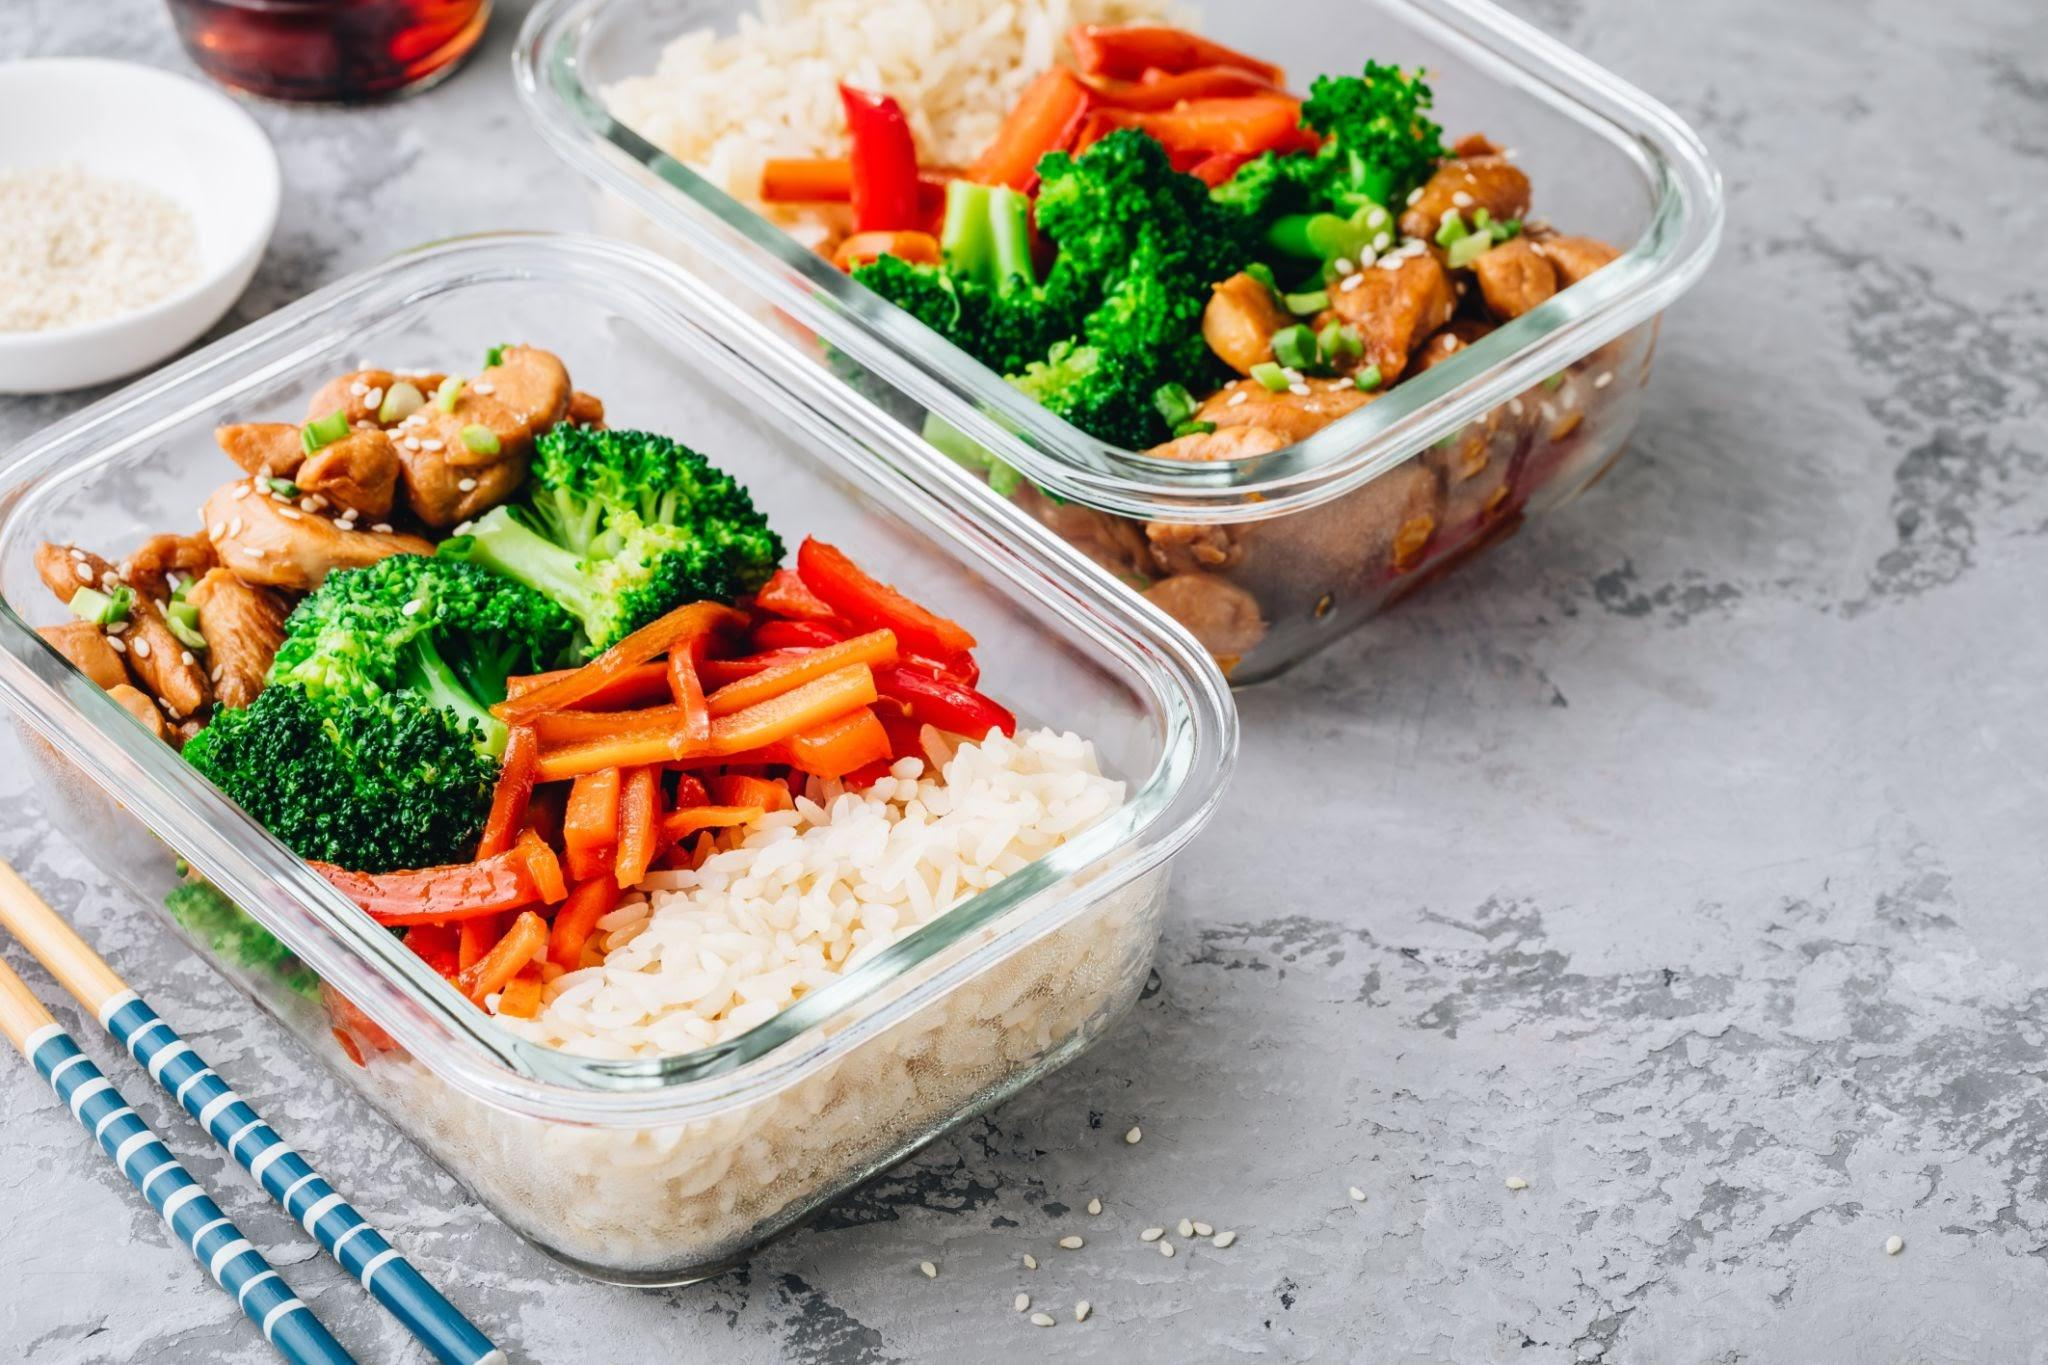

In [2]:
#@title Demo image analysis

import PIL.Image, base64, io

from IPython.display import HTML, display

!curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw

img = PIL.Image.open('image.jpg')
response = model.generate_content(img)

# convert the image to Base64 for embedding in HTML
buffered = io.BytesIO()
img.save(buffered, format="JPEG")
img_str = base64.b64encode(buffered.getvalue()).decode()

# construct a table to render the view
table_html = f"""
<table>
<tr>
    <td><img src='data:image/jpeg;base64,{img_str}' style='width:500px; height:auto;'></td>
</tr>
<tr>
    <td style='vertical-align: bottom;'>{response.text}</td>
</tr>
</table>
"""

# display the table
display(HTML(table_html))

In [3]:
#@title Upload your own image

from google.colab import files
uploaded = files.upload()

Saving cookies.jpeg to cookies.jpeg


""
These look delicious! They look like chocolate chip cookies with pastel-colored candy pieces.

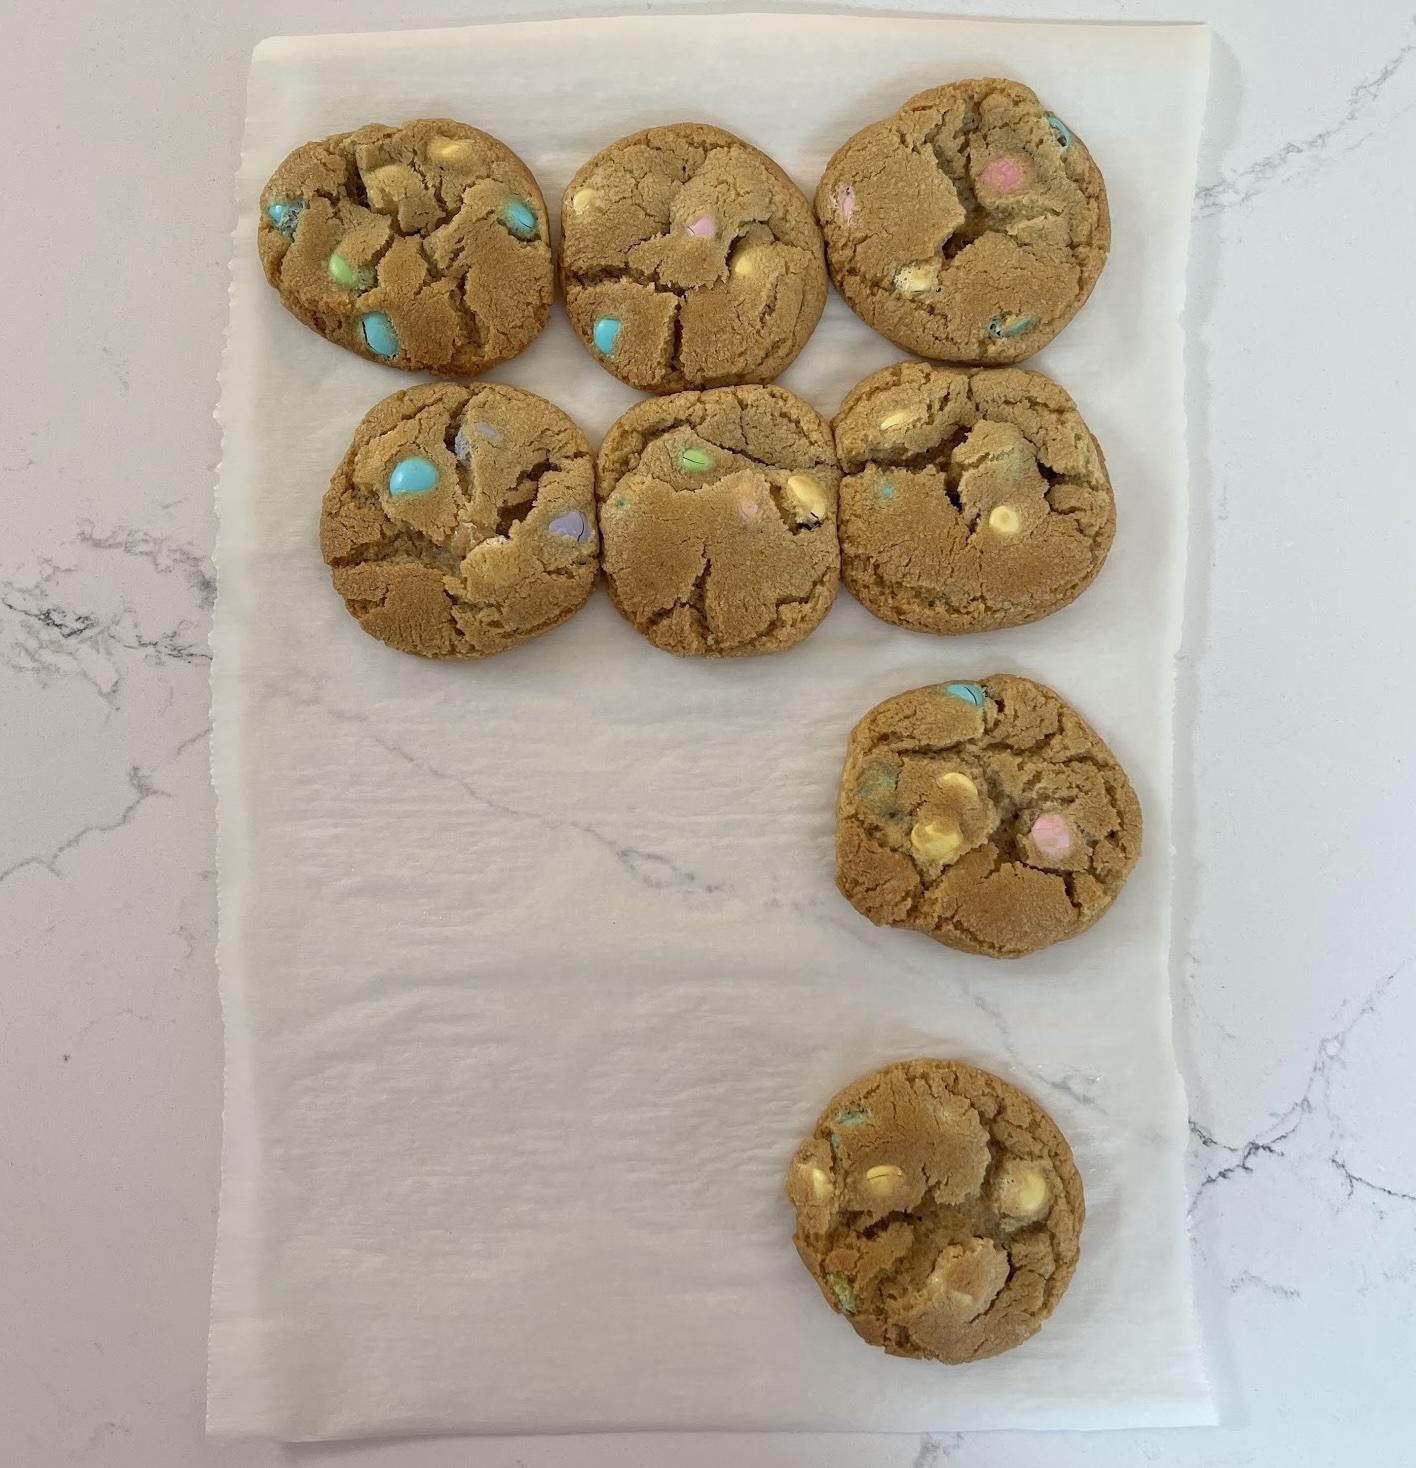

In [8]:
#@title Ask Gemini about your image

img = PIL.Image.open(list(uploaded.keys())[0])
response = model.generate_content(img)

# convert the image to Base64 for embedding in HTML
buffered = io.BytesIO()
img.save(buffered, format="JPEG")
img_str = base64.b64encode(buffered.getvalue()).decode()

# construct a table
table_html = f"""
<table>
<tr>
    <td><img src='data:image/jpeg;base64,{img_str}' style='width:500px; height:auto;'></td>
</tr>
<tr>
    <td style='vertical-align: bottom;'>{response.text}</td>
</tr>
</table>
"""

# display the table
display(HTML(table_html))